In [74]:
# FIRST GENERATE ALL POSSIBLE COMBINATION OF X, A, G IN A 5-LETTER PATTERN

from itertools import product

def generate_all_feedback_patterns():
    # Generate all possible combinations of X, A, G in a 5-letter pattern
    feedback_states = ['X', 'A', 'G']
    all_patterns = [''.join(pattern) for pattern in product(feedback_states, repeat=5)]
    return all_patterns

all_patterns = generate_all_feedback_patterns()

In [75]:
import wordle_functions as wdl
import tempfile
import json
import os



In [76]:
# Initialize an empty dictionary
outcomes = {}

# Define a pattern and criteria
pattern = "pattern1"
criteria = "criteria1"

# Assign the criteria to the pattern in the outcomes dictionary
outcomes[pattern] = criteria

# Print the dictionary to see the result
print(outcomes)

{'pattern1': 'criteria1'}


In [77]:
nested_dict = {
    "person1": {
        "name": "John",
        "details": {
            "age": 30,
            "city": "London"
        }
    },
    "person2": {
        "name": "Sarah",
        "details": {
            "age": 25,
            "city": "Manchester"
        }
    }
}

for key, value in nested_dict.items():
    print(f"Key: {key}, Value: {value}")

Key: person1, Value: {'name': 'John', 'details': {'age': 30, 'city': 'London'}}
Key: person2, Value: {'name': 'Sarah', 'details': {'age': 25, 'city': 'Manchester'}}


In [78]:
# Our dictionary structure example
outcomes = {
    "XXXXX": {
        "criteria": {
            "exclusions": {
                "1st char": "A",
                "2nd char": "I"
            },
            "known_letters": "-----",
            "unlocated_letters_in_word": ""
        },
        "remaining_candidates": {
            "count": 42,
            "words": ["SLATE", "CRANE"]
        }
    },
    "GXXXX": {
        # similar structure
    }
}
# # For a specific pattern (e.g., "XXXXX")
pattern = "XXXXX"
criteria = outcomes[pattern]["criteria"]

# # Now loop through just the criteria items
# for criteria_key, criteria_value in criteria.items():
#     print(f"Key: {criteria_key}")
#     print(f"Value: {criteria_value}")
#     print("---")

for pattern, pattern_data in outcomes.items():
    print(f"Pattern: {pattern}")
    
    # Access criteria directly
    criteria = pattern_data["criteria"]
    
    # Loop through criteria items
    for criteria_key, criteria_value in criteria.items():
        print(f"  {criteria_key}: {criteria_value}")
    
    print("---")

Pattern: XXXXX
  exclusions: {'1st char': 'A', '2nd char': 'I'}
  known_letters: -----
  unlocated_letters_in_word: 
---
Pattern: GXXXX


KeyError: 'criteria'

In [ ]:
import wordle_functions as wdl, pandas as pd

pattern_dict = json.load(open("aider_outcomes.json"))
word_list = pd.read_csv("word_list.csv")

pattern = "XXXXX"




criteria = pattern_dict[pattern]

candidate_list = wdl.wordle_filter(criteria, word_list)["WORD"].tolist()
candidate_count = len(candidate_list)

candidates = {}
candidates[pattern] = {"candidates": {"list": candidate_list, "count": candidate_count}}



In [ ]:
counter = 0
for pattern in pattern_dict:
    counter += 1
    print(f"{counter} | Pattern: {pattern}")
    

In [ ]:
def wordle_filter_debugged(inputs, word_list: pd.DataFrame):
    """
    Applies all filtering criteria to get candidate words.
    """
    known_letters = inputs['known_letters'].upper()
    unlocated_letters = inputs['unlocated_letters_in_word'].upper()
    exclusions = {k: v.upper() for k, v in inputs['exclusions'].items()}
    letters_not_in_word = inputs['letters_not_in_word'].upper()
    
    candidates = word_list.copy()
    print("Initial candidates - rows:", len(candidates), "columns:", candidates.columns.tolist())
    
    if known_letters:
        candidates = wdl.candidates_match_known(candidates, known_letters)
        print("After candidates_match_known - rows:", len(candidates), "columns:", candidates.columns.tolist())
    
    if any(bool(chars) for chars in exclusions.values()):
        candidates = wdl.filter_words_by_exclusions(candidates, exclusions)
        print("After filter_words_by_exclusions - rows:", len(candidates), "columns:", candidates.columns.tolist())
    
    if unlocated_letters:
        candidates = wdl.candidates_all_letters(candidates, known_letters, unlocated_letters)
        print("After candidates_all_letters - rows:", len(candidates), "columns:", candidates.columns.tolist())
    
    if letters_not_in_word:
        candidates = wdl.candidates_ex_excluded(candidates, letters_not_in_word)
        print("After candidates_ex_excluded - rows:", len(candidates), "columns:", candidates.columns.tolist())
    
    return candidates

In [ ]:
import importlib
import wordle_functions as wdl
importlib.reload(wdl)

<module 'wordle_functions' from 'c:\\Users\\JBA33\\OneDrive - Sky\\Documents\\python\\wordle\\WordlePy\\wordle_functions.py'>

In [ ]:
counter = 0
new_dict = {}

patterns_with_0 = ["GGXXG","GAGGG","GAGGX","AGAGA","AGAAA","XGAXG","GGXAG"]
patterns_with_0_ex_bad = ["GGXXG","GAGGG","GAGGX","AGAGA","AGAAA","XGAXG"] # excluded "GGXAG"

#for pattern in pattern_dict:
#for pattern in patterns_with_0_ex_bad:
for pattern in patterns_with_0:
    counter += 1
    print(f"{counter} | Pattern: {pattern}")
    criteria = pattern_dict[pattern]

    candidate_list = wordle_filter_debugged(criteria, word_list)["WORD"].tolist()
    candidate_count = len(candidate_list)
    print(f"{candidate_count} candidates")
    new_dict[pattern] = {"candidates": {"list": candidate_list, "count": candidate_count}}

new_dict


1 | Pattern: GGXXG
Initial candidates - rows: 12972 columns: ['WORD']
After candidates_match_known - rows: 4 columns: ['WORD']
After filter_words_by_exclusions - rows: 0 columns: ['WORD']
After candidates_ex_excluded - rows: 0 columns: ['WORD']
0 candidates
2 | Pattern: GAGGG
Initial candidates - rows: 12972 columns: ['WORD']
After candidates_match_known - rows: 3 columns: ['WORD']
After filter_words_by_exclusions - rows: 2 columns: ['WORD']
After candidates_all_letters - rows: 0 columns: ['WORD']
0 candidates
3 | Pattern: GAGGX
Initial candidates - rows: 12972 columns: ['WORD']
After candidates_match_known - rows: 9 columns: ['WORD']
After filter_words_by_exclusions - rows: 4 columns: ['WORD']
After candidates_all_letters - rows: 0 columns: ['WORD']
After candidates_ex_excluded - rows: 0 columns: ['WORD']
0 candidates
4 | Pattern: AGAGA
Initial candidates - rows: 12972 columns: ['WORD']
After candidates_match_known - rows: 350 columns: ['WORD']
After filter_words_by_exclusions - rows:

{'GGXXG': {'candidates': {'list': [], 'count': 0}},
 'GAGGG': {'candidates': {'list': [], 'count': 0}},
 'GAGGX': {'candidates': {'list': [], 'count': 0}},
 'AGAGA': {'candidates': {'list': [], 'count': 0}},
 'AGAAA': {'candidates': {'list': [], 'count': 0}},
 'XGAXG': {'candidates': {'list': [], 'count': 0}},
 'GGXAG': {'candidates': {'list': [], 'count': 0}}}

In [ ]:
counter = 0
new_dict = {}

patterns_with_0 = ["GGXXG","GAGGG","GAGGX","AGAGA","AGAAA","XGAXG","GGXAG"]
patterns_with_0_ex_bad = ["GGXXG","GAGGG","GAGGX","AGAGA","AGAAA","XGAXG"] # excluded "GGXAG"
bad_patterns = list(set(patterns_with_0) - set(patterns_with_0_ex_bad))

#for pattern in pattern_dict:
for pattern in bad_patterns:
    counter += 1
    print(f"{counter} | Pattern: {pattern}")
    criteria = pattern_dict[pattern]

    candidate_list = wdl.wordle_filter(criteria, word_list)["WORD"].tolist()
    candidate_count = len(candidate_list)
    print(f"{candidate_count} candidates")
    new_dict[pattern] = {"candidates": {"list": candidate_list, "count": candidate_count}}

new_dict

1 | Pattern: GGXAG


KeyError: 'WORD'

In [ ]:
patterns_with_0 = ["GGXXG","GAGGG","GAGGX","AGAGA","AGAAA","XGAXG","GGXAG"]
bad_pattern = "GGXAG"

pattern = "GGXAG"
inputs = pattern_dict[pattern]

known_letters = inputs['known_letters'].upper()
unlocated_letters = inputs['unlocated_letters_in_word'].upper()
exclusions = {k: v.upper() for k, v in inputs['exclusions'].items()}
letters_not_in_word = inputs['letters_not_in_word'].upper()


In [ ]:
pattern = "GGXAG"

inputs = pattern_dict[pattern]
known_letters = inputs['known_letters'].upper()
unlocated_letters = inputs['unlocated_letters_in_word'].upper()
exclusions = {k: v.upper() for k, v in inputs['exclusions'].items()}
letters_not_in_word = inputs['letters_not_in_word'].upper()

candidates = word_list.copy()

if known_letters:
    print({"known_letters": known_letters})
    candidates = wdl.candidates_match_known(candidates, known_letters)
    candidates1 = len(candidates["WORD"])

if any(bool(chars) for chars in exclusions.values()):
    print({"exclusions": exclusions})
    candidates = wdl.filter_words_by_exclusions(candidates, exclusions)
    print(len(candidates))
    candidates2 = len(candidates["WORD"])

if unlocated_letters:
    print({"unlocated_letters": unlocated_letters})  
    candidates = wdl.candidates_all_letters(candidates, known_letters, unlocated_letters)
    print(len(candidates))
    candidates3 = len(candidates["WORD"])
    
if letters_not_in_word:
    print({"letters_not_in_word": letters_not_in_word})
    candidates = wdl.candidates_ex_excluded(candidates, letters_not_in_word)
    print(len(candidates))
    candidates4 = len(candidates["WORD"])



{'known_letters': 'AI--R'}
{'exclusions': {'1st char': '', '2nd char': '', '3rd char': 'D', '4th char': 'E', '5th char': ''}}
0
{'unlocated_letters': 'E'}
0


KeyError: 'WORD'

In [ ]:

import json

def summarize_structure(data, indent=0):
    """Recursively prints the keys and types of a nested dictionary or list."""
    spacing = "  " * indent
    if isinstance(data, dict):
        for key, value in data.items():
            print(f"{spacing}{key}: {type(value).__name__}")
            summarize_structure(value, indent + 1)
    elif isinstance(data, list):
        if data:
            print(f"{spacing}List of {len(data)} items, first item type: {type(data[0]).__name__}")
            # Optionally summarize just the first item if it's a complex structure
            summarize_structure(data[0], indent + 1)
        else:
            print(f"{spacing}Empty list")
    else:
        # Base case: data is neither dict nor list
        pass

# Load your JSON file
with open('aider_outcomes_with_candidates.json', 'r') as f:
    data = json.load(f)

# Summarize the structure
summarize_structure(data)


In [ ]:
import json
import pandas as pd

your_file = 'aider_outcomes_with_candidates.json'

# Load your JSON file into a dictionary
with open(your_file, 'r') as f:
    data = json.load(f)

# Create a list of records with 'pattern' and 'candidate_count'
records = []
for pattern, details in data.items():
    # Safely extract the candidate count; defaults to 0 if missing
    candidate_count = details.get("remaining_candidates", {}).get("count", 0)
    records.append({"pattern": pattern, "candidate_count": candidate_count})

# Convert the list of records into a DataFrame
df = pd.DataFrame(records)
print(df)


    pattern  candidate_count
0     XXXXX             1342
1     XXXXA              482
2     XXXXG               31
3     XXXAX              914
4     XXXAA              442
..      ...              ...
238   GGGAA                0
239   GGGAG                0
240   GGGGX                2
241   GGGGA                0
242   GGGGG                1

[243 rows x 2 columns]


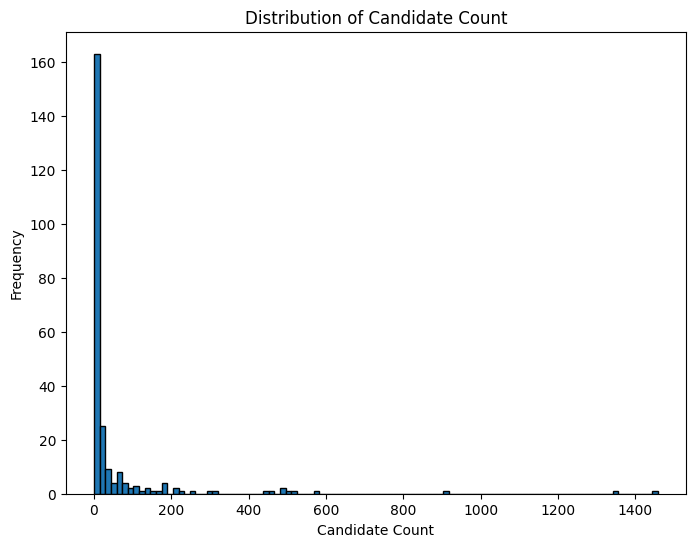

In [ ]:
import matplotlib.pyplot as plt

# Assuming df is your DataFrame with 'candidate_count'
plt.figure(figsize=(8, 6))
plt.hist(df['candidate_count'], bins=100, edgecolor='black')
plt.xlabel('Candidate Count')
plt.ylabel('Frequency')
plt.title('Distribution of Candidate Count')
plt.show()

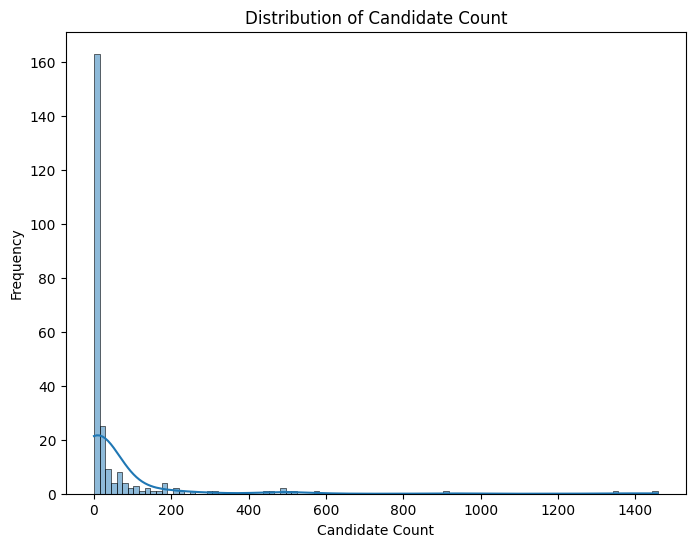

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 6))
sns.histplot(df['candidate_count'], bins=100, kde=True)
plt.xlabel('Candidate Count')
plt.ylabel('Frequency')
plt.title('Distribution of Candidate Count')
plt.show()

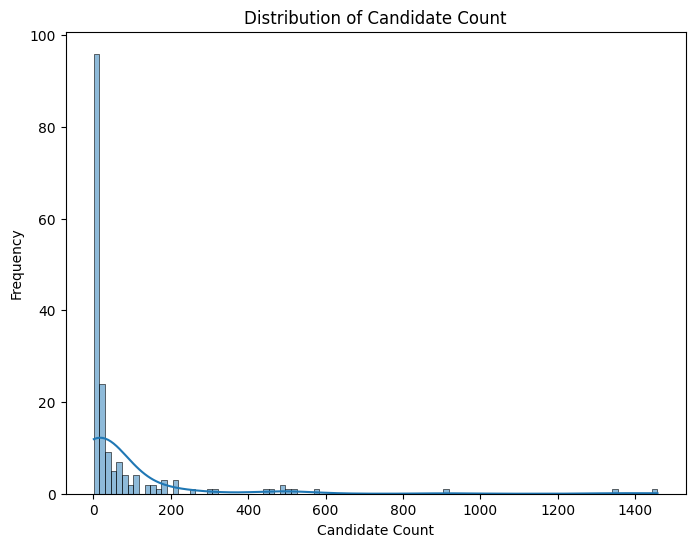

In [ ]:
filtered_data = {
    pattern: details
    for pattern, details in data.items()
    if details.get("remaining_candidates", {}).get("count", 0) > 0
}

records = []
for pattern, details in filtered_data.items():
    # Safely extract the candidate count; defaults to 0 if missing
    candidate_count = details.get("remaining_candidates", {}).get("count", 0)
    records.append({"pattern": pattern, "candidate_count": candidate_count})

# Convert the list of records into a DataFrame
df_filtered = pd.DataFrame(records)

plt.figure(figsize=(8, 6))
sns.histplot(df_filtered['candidate_count'], bins=100, kde=True)
plt.xlabel('Candidate Count')
plt.ylabel('Frequency')
plt.title('Distribution of Candidate Count')
plt.show()

In [ ]:
import expected_value as ev
importlib.reload(ev)

<module 'expected_value' from 'c:\\Users\\JBA33\\OneDrive - Sky\\Documents\\python\\wordle\\WordlePy\\expected_value.py'>

In [ ]:


candidates = filtered_data["XXXXG"]["remaining_candidates"]["words"]
# ev.perform_full_analysis(candidates, candidates)

candidates_df = pd.DataFrame({"WORD": candidates})
ev.perform_full_analysis(candidates, candidates_df)


# lengths = candidates_df["WORD"].apply(len)
# print(lengths.value_counts())

(     Word  Max   Expected  Median  25th Perc  75th Perc
 29  TUMOR    5   2.741935     2.0        1.0        5.0
 28  SUTOR    5   2.806452     3.0        2.0        4.0
 16  MUCOR    6   2.870968     3.0        1.0        4.0
 20  SCOUR    7   2.935484     2.0        1.0        3.0
 26  STOUR    7   3.000000     2.0        2.0        3.0
 14  MOHUR    6   3.129032     3.0        1.0        5.0
 1   CLOUR    7   3.193548     2.0        1.0        4.0
 10  HUMOR    6   3.258065     2.0        1.5        5.0
 22  SOHUR    8   3.516129     3.0        1.0        5.5
 27  SUHUR    7   3.870968     4.0        2.0        6.0
 5   FLOUR    8   3.903226     4.0        1.5        6.0
 19  RUMOR    7   3.967742     4.0        2.0        6.0
 30  TUTOR    6   4.032258     5.0        2.0        6.0
 6   FLUOR    7   4.419355     5.0        1.0        7.0
 15  MOTOR   10   4.580645     3.0        2.5        7.5
 3   CRUOR    8   4.677419     4.0        1.5        7.5
 21  SMOOR    9   4.806452     

In [82]:

def max_analysis_for_pattern(pattern):
    # Your logic to generate a DataFrame for the given pattern
    candidates = filtered_data[pattern]["remaining_candidates"]["words"]
    candidates_df = pd.DataFrame({"WORD": candidates})
    data = ev.perform_full_analysis(candidates, candidates_df)
    #return pd.DataFrame(data)
    return data


full_analysis_xxxxx = max_analysis_for_pattern("XXXXX")



In [79]:
print(_oh)

{1: 'ok', 2: 'ok', 3: 'ok', 4: 'ok', 5: 'ok', 6: 'ok', 11: {'exclusions': {'1st char': 'A', '2nd char': 'I', '3rd char': 'D', '4th char': 'E', '5th char': 'R'}, 'known_letters': '-----', 'unlocated_letters_in_word': '', 'letters_not_in_word': 'AIDER', 'previous_guesses': ['AIDER XXXXX']}, 12: {'exclusions': {'1st char': 'A', '2nd char': 'I', '3rd char': 'D', '4th char': 'E', '5th char': 'R'}, 'known_letters': '-----', 'unlocated_letters_in_word': '', 'letters_not_in_word': 'AIDER', 'previous_guesses': ['AIDER XXXXX']}, 13: 'ok', 14:         WORD
1037   BHOOT
1039   BHUTS
1192   BLOBS
1193   BLOCK
1194   BLOCS
...      ...
12953  ZOOTY
12955  ZOPPO
12959  ZOUKS
12962  ZULUS
12969  ZYGON

[1342 rows x 1 columns], 15: 'ok', 16: 'ok', 17: 'ok', 18: 'ok', 29: 'ok', 33: 'ok', 34: {'GGXXG': {'candidates': {'list': [], 'count': 0}}, 'GAGGG': {'candidates': {'list': [], 'count': 0}}, 'GAGGX': {'candidates': {'list': [], 'count': 0}}, 'AGAGA': {'candidates': {'list': [], 'count': 0}}, 'AGAAA': {

In [81]:
df = Out[66]

In [83]:
print(type(full_analysis_xxxxx))


<class 'tuple'>


In [86]:
print(full_analysis_xxxxx[0])

       Word  Max    Expected  Median  25th Perc  75th Perc
170   CLOTS  108   34.804769    24.0       11.0       55.0
804   PLOTS  115   35.785395    22.0       11.0       50.0
1090  STOLN  107   36.417288    29.0       15.0       45.0
196   COLTS  131   36.608048    23.0       13.0       40.0
828   POLTS  131   37.146051    23.0       12.0       50.0
...     ...  ...         ...     ...        ...        ...
798   PHPHT  591  313.197466   195.0       76.0      591.0
420   GYNNY  630  350.659463   245.0       51.0      630.0
424   GYPPY  633  356.153502   210.5       80.0      633.0
791   OXBOW  652  367.252608   349.0       98.0      652.0
1296  XYLYL  654  405.143070   256.0      211.0      654.0

[1342 rows x 6 columns]


In [87]:
print(type(full_analysis_xxxxx[0]))

<class 'pandas.core.frame.DataFrame'>


In [88]:
data_xxxxx = list(full_analysis_xxxxx)
with open('full_analysis_xxxxx.json', 'w') as file:
    json.dump(data_xxxxx, file)

TypeError: Object of type DataFrame is not JSON serializable

In [89]:
from collections import namedtuple

# For the first namedtuple in the tuple:
headers = full_analysis_xxxxx[0]._fields
df = pd.DataFrame(full_analysis_xxxxx, columns=headers)

AttributeError: 'DataFrame' object has no attribute '_fields'

In [ ]:
full_analysis_xxxxx_df = full_analysis_xxxxx[0]


In [92]:
full_analysis_xxxxx_df.to_csv('full_analysis_xxxxx.csv', index=False)